# Multi-Layer Perceptron in `keras`

In this series of lab sessions, you will use a Python library called `keras`.
You should visit [`keras` webpage](https://keras.io/) to get access to more information about this library, including a comprehensive documentation.

## The `Sequential` model in `keras`

This library offers two ways to define neural network models. 
We will start with the `Sequential` class of `keras` models.
Below is an example of how to define a `Sequential` model:

In [1]:
import os

os.environ["KERAS_BACKEND"] = "torch"

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, InputLayer

**1. Define layers, and add them one by one to the model**


In [3]:
input_layer = InputLayer(input_shape=(24,))
hidden_layer1 = Dense(units=12, activation="relu")
hidden_layer2 = Dense(units=12, activation="sigmoid")
#[...]
output_layer = Dense(units=3, activation="linear")

model = Sequential([
    input_layer,
    hidden_layer1,
    hidden_layer2,
    # ...
    output_layer
])

/Users/rtavenar/py3.10_ml/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


**2. Pick an optimization algorithm (optimizer) and a loss function to be optimized**

Usual loss functions are:
* `"mse"` for regression,
* `"categorical_crossentropy"` for multiclass classification (when the `y` array fed to `fit` is of shape $(n, n_\text{classes})$)
* `"binary_crossentropy"` for binary classification (when the model is fed with `y` array of shape $(n, 1)$)

One can also specify additional metrics to be printed during training (correct classification rate here).

In [4]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

**3. Fit the model**

NB: do not try to execute the following line of code: variables `X_train` and `y_train` do not exist yet!

In [5]:
#model.fit(X_train, y_train, verbose=2, epochs=10, batch_size=200)

## Data pre-processing

Have a look at the `prepare_mnist` and `prepare_boston` functions defined below.

**Question #1.** What do these functions do? What are the shapes of returned arrays? Does the returned data correpond to classification or regression problems?

In [6]:
from sklearn.preprocessing import MinMaxScaler
from keras.datasets import mnist, boston_housing
from keras.utils import to_categorical

def prepare_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))
    scaler = MinMaxScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return x_train, x_test, y_train, y_test


def prepare_boston():
    (x_train, y_train), (x_test, y_test) = boston_housing.load_data()
    scaler_x = MinMaxScaler()
    scaler_x.fit(x_train)
    x_train = scaler_x.transform(x_train)
    x_test = scaler_x.transform(x_test)
    scaler_y = MinMaxScaler()
    scaler_y.fit(y_train.reshape((-1, 1)))
    y_train = scaler_y.transform(y_train.reshape((-1, 1)))
    y_test = scaler_y.transform(y_test.reshape((-1, 1)))
    return x_train, x_test, y_train, y_test
  
x_train, x_test, y_train, y_test = prepare_mnist()

In [7]:
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [8]:
x_train, x_test, y_train, y_test = prepare_boston()

In [9]:
print(x_train.shape, y_train.shape)
print(y_train[:10])

(404, 13) (404, 1)
[[0.22666667]
 [0.82888889]
 [1.        ]
 [0.35777778]
 [0.28222222]
 [0.3       ]
 [0.14      ]
 [0.23555556]
 [0.23555556]
 [0.20888889]]


## Building your first models

In the following, when fitting models, restrict the training to 10 epochs (which is not realistic, but training for more epochs takes time...)

**Question #2.** Following the guidelines provided above, implement a linear regression model for the `boston` dataset that would optimize on a least squares objective using Stochastic Gradient Descent and fit your model to the corresponding training data.

In [10]:
input_layer = InputLayer(input_shape=(13,))
output_layer = Dense(units=1, activation="linear")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="mse", optimizer="sgd")
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10


/Users/rtavenar/py3.10_ml/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


5/5 - 1s - 218ms/step - loss: 0.3178
Epoch 2/10
5/5 - 0s - 4ms/step - loss: 0.2322
Epoch 3/10
5/5 - 0s - 4ms/step - loss: 0.1924
Epoch 4/10
5/5 - 0s - 4ms/step - loss: 0.1710
Epoch 5/10
5/5 - 0s - 4ms/step - loss: 0.1628
Epoch 6/10
5/5 - 0s - 4ms/step - loss: 0.1563
Epoch 7/10
5/5 - 0s - 4ms/step - loss: 0.1514
Epoch 8/10
5/5 - 0s - 4ms/step - loss: 0.1483
Epoch 9/10
5/5 - 0s - 4ms/step - loss: 0.1447
Epoch 10/10
5/5 - 0s - 4ms/step - loss: 0.1425


**Question #3.** Similarly, define a logistic regression model for the `mnist` dataset and print its training accuracy during training.

In [11]:
x_train, x_test, y_train, y_test = prepare_mnist()

input_layer = InputLayer(input_shape=x_train.shape[1:])
output_layer = Dense(units=y_train.shape[1], activation="softmax")

model = Sequential([
    input_layer,
    output_layer
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10


/Users/rtavenar/py3.10_ml/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


600/600 - 5s - 9ms/step - accuracy: 0.8459 - loss: 0.6229
Epoch 2/10
600/600 - 4s - 7ms/step - accuracy: 0.9058 - loss: 0.3462
Epoch 3/10
600/600 - 4s - 6ms/step - accuracy: 0.9148 - loss: 0.3095
Epoch 4/10
600/600 - 4s - 7ms/step - accuracy: 0.9186 - loss: 0.2920
Epoch 5/10
600/600 - 4s - 6ms/step - accuracy: 0.9221 - loss: 0.2818
Epoch 6/10
600/600 - 4s - 6ms/step - accuracy: 0.9240 - loss: 0.2750
Epoch 7/10
600/600 - 4s - 6ms/step - accuracy: 0.9248 - loss: 0.2694
Epoch 8/10
600/600 - 4s - 6ms/step - accuracy: 0.9265 - loss: 0.2649
Epoch 9/10
600/600 - 4s - 6ms/step - accuracy: 0.9269 - loss: 0.2619
Epoch 10/10
600/600 - 4s - 6ms/step - accuracy: 0.9285 - loss: 0.2585


**Question #4.** Compare performance (in terms of training accuracy, we will come back to better ways to compare models afterwards) of this logistic regression model with that of a neural network with respectively 1, 2, and 3 hidden layers of 128 neurons each.
You will use the `"relu"` activation function for hidden layers.

In [12]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - 8ms/step - accuracy: 0.9053 - loss: 0.3399
Epoch 2/10
600/600 - 4s - 7ms/step - accuracy: 0.9560 - loss: 0.1531
Epoch 3/10
600/600 - 4s - 7ms/step - accuracy: 0.9681 - loss: 0.1090
Epoch 4/10
600/600 - 5s - 8ms/step - accuracy: 0.9751 - loss: 0.0846
Epoch 5/10
600/600 - 5s - 8ms/step - accuracy: 0.9796 - loss: 0.0680
Epoch 6/10
600/600 - 5s - 8ms/step - accuracy: 0.9831 - loss: 0.0566
Epoch 7/10
600/600 - 5s - 8ms/step - accuracy: 0.9866 - loss: 0.0459
Epoch 8/10
600/600 - 5s - 8ms/step - accuracy: 0.9894 - loss: 0.0381
Epoch 9/10
600/600 - 5s - 8ms/step - accuracy: 0.9912 - loss: 0.0318
Epoch 10/10
600/600 - 5s - 8ms/step - accuracy: 0.9930 - loss: 0.0263


In [13]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - 9ms/step - accuracy: 0.9150 - loss: 0.2963
Epoch 2/10
600/600 - 5s - 8ms/step - accuracy: 0.9652 - loss: 0.1142
Epoch 3/10
600/600 - 5s - 8ms/step - accuracy: 0.9772 - loss: 0.0764
Epoch 4/10
600/600 - 5s - 8ms/step - accuracy: 0.9821 - loss: 0.0579
Epoch 5/10
600/600 - 5s - 8ms/step - accuracy: 0.9865 - loss: 0.0437
Epoch 6/10
600/600 - 5s - 8ms/step - accuracy: 0.9884 - loss: 0.0364
Epoch 7/10
600/600 - 5s - 8ms/step - accuracy: 0.9907 - loss: 0.0294
Epoch 8/10
600/600 - 5s - 8ms/step - accuracy: 0.9922 - loss: 0.0245
Epoch 9/10
600/600 - 5s - 8ms/step - accuracy: 0.9938 - loss: 0.0194
Epoch 10/10
600/600 - 5s - 8ms/step - accuracy: 0.9951 - loss: 0.0159


In [14]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
600/600 - 5s - 9ms/step - accuracy: 0.9181 - loss: 0.2779
Epoch 2/10
600/600 - 5s - 9ms/step - accuracy: 0.9673 - loss: 0.1086
Epoch 3/10
600/600 - 6s - 9ms/step - accuracy: 0.9772 - loss: 0.0748
Epoch 4/10
600/600 - 6s - 9ms/step - accuracy: 0.9822 - loss: 0.0563
Epoch 5/10
600/600 - 6s - 9ms/step - accuracy: 0.9855 - loss: 0.0453
Epoch 6/10
600/600 - 6s - 9ms/step - accuracy: 0.9885 - loss: 0.0351
Epoch 7/10
600/600 - 5s - 9ms/step - accuracy: 0.9888 - loss: 0.0321
Epoch 8/10
600/600 - 6s - 9ms/step - accuracy: 0.9915 - loss: 0.0251
Epoch 9/10
600/600 - 6s - 9ms/step - accuracy: 0.9923 - loss: 0.0232
Epoch 10/10
600/600 - 6s - 9ms/step - accuracy: 0.9928 - loss: 0.0203


In [15]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 404,384 (1.54 MB)

 Trainable params: 134,794 (526.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 269,590 (1.03 MB)

**Question #5.** `keras` models offer a `count_params()` method to get the number of parameters to be learned in the model. Use this facility to get the number of parameters of your 3-hidden-layer model and build a new one-hidden-layer model with an equivalent number of parameters. Compare performance of these two models with similar number of parameters.

In [16]:
units = 134794 / 794

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2)

134365
Epoch 1/10
600/600 - 5s - 8ms/step - accuracy: 0.9096 - loss: 0.3214
Epoch 2/10
600/600 - 5s - 8ms/step - accuracy: 0.9579 - loss: 0.1453
Epoch 3/10
600/600 - 5s - 8ms/step - accuracy: 0.9705 - loss: 0.1003
Epoch 4/10
600/600 - 4s - 7ms/step - accuracy: 0.9782 - loss: 0.0750
Epoch 5/10
600/600 - 4s - 7ms/step - accuracy: 0.9821 - loss: 0.0591
Epoch 6/10
600/600 - 5s - 8ms/step - accuracy: 0.9869 - loss: 0.0462
Epoch 7/10
600/600 - 5s - 8ms/step - accuracy: 0.9893 - loss: 0.0369
Epoch 8/10
600/600 - 5s - 8ms/step - accuracy: 0.9912 - loss: 0.0302
Epoch 9/10
600/600 - 5s - 8ms/step - accuracy: 0.9939 - loss: 0.0237
Epoch 10/10
600/600 - 5s - 8ms/step - accuracy: 0.9950 - loss: 0.0197


## A better way to compare models

Comparing models based on training accuracy (resp. loss) is a "great" way to overfit your model to the training data.
A better way to compare models is to use hold out data (aka validation set).

To do so, `keras` allows to pass, at `fit` time, a fraction of the training data to be used as validation set. Have a look [there](https://keras.io/api/models/model_training_apis/#fit-method) for more details about how validation samples are selected.

**Question #6.** Repeat model comparisons above (relying on validation scores) using 30% of training data as validation set.

In [17]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

Epoch 1/10
420/420 - 5s - 11ms/step - accuracy: 0.9038 - loss: 0.3343 - val_accuracy: 0.9469 - val_loss: 0.1764
Epoch 2/10
420/420 - 5s - 11ms/step - accuracy: 0.9612 - loss: 0.1293 - val_accuracy: 0.9569 - val_loss: 0.1419
Epoch 3/10
420/420 - 5s - 12ms/step - accuracy: 0.9743 - loss: 0.0860 - val_accuracy: 0.9662 - val_loss: 0.1143
Epoch 4/10
420/420 - 5s - 11ms/step - accuracy: 0.9789 - loss: 0.0643 - val_accuracy: 0.9694 - val_loss: 0.1076
Epoch 5/10
420/420 - 5s - 11ms/step - accuracy: 0.9837 - loss: 0.0494 - val_accuracy: 0.9731 - val_loss: 0.1001
Epoch 6/10
420/420 - 5s - 12ms/step - accuracy: 0.9885 - loss: 0.0369 - val_accuracy: 0.9703 - val_loss: 0.1054
Epoch 7/10
420/420 - 5s - 12ms/step - accuracy: 0.9894 - loss: 0.0342 - val_accuracy: 0.9705 - val_loss: 0.1126
Epoch 8/10
420/420 - 5s - 12ms/step - accuracy: 0.9913 - loss: 0.0267 - val_accuracy: 0.9716 - val_loss: 0.1159
Epoch 9/10
420/420 - 5s - 12ms/step - accuracy: 0.9921 - loss: 0.0241 - val_accuracy: 0.9703 - val_loss:

In [18]:
units = 134794 / 794

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=units, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
print(model.count_params())
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=.3)

134365
Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.8983 - loss: 0.3683 - val_accuracy: 0.9391 - val_loss: 0.2108
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9521 - loss: 0.1667 - val_accuracy: 0.9559 - val_loss: 0.1545
Epoch 3/10
420/420 - 4s - 9ms/step - accuracy: 0.9663 - loss: 0.1175 - val_accuracy: 0.9609 - val_loss: 0.1335
Epoch 4/10
420/420 - 4s - 9ms/step - accuracy: 0.9734 - loss: 0.0906 - val_accuracy: 0.9674 - val_loss: 0.1131
Epoch 5/10
420/420 - 4s - 9ms/step - accuracy: 0.9803 - loss: 0.0704 - val_accuracy: 0.9678 - val_loss: 0.1093
Epoch 6/10
420/420 - 4s - 9ms/step - accuracy: 0.9845 - loss: 0.0560 - val_accuracy: 0.9707 - val_loss: 0.1011
Epoch 7/10
420/420 - 4s - 9ms/step - accuracy: 0.9873 - loss: 0.0455 - val_accuracy: 0.9718 - val_loss: 0.0969
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9895 - loss: 0.0372 - val_accuracy: 0.9727 - val_loss: 0.0911
Epoch 9/10
420/420 - 4s - 9ms/step - accuracy: 0.9916 - loss: 0.0308 - val_accuracy: 0.9729 - val_loss

## Optimizers and learning rate

**Question #7.** Change the optimizer used for your model. Use an optimizer with momentum and adaptive learning rate.

In [19]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 5s - 12ms/step - accuracy: 0.9015 - loss: 0.3475 - val_accuracy: 0.9439 - val_loss: 0.1901
Epoch 2/10
420/420 - 5s - 12ms/step - accuracy: 0.9562 - loss: 0.1457 - val_accuracy: 0.9563 - val_loss: 0.1456
Epoch 3/10
420/420 - 5s - 11ms/step - accuracy: 0.9711 - loss: 0.0986 - val_accuracy: 0.9658 - val_loss: 0.1189
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9769 - loss: 0.0762 - val_accuracy: 0.9687 - val_loss: 0.1074
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9839 - loss: 0.0551 - val_accuracy: 0.9696 - val_loss: 0.1029
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9873 - loss: 0.0427 - val_accuracy: 0.9694 - val_loss: 0.1084
Epoch 7/10
420/420 - 4s - 11ms/step - accuracy: 0.9892 - loss: 0.0344 - val_accuracy: 0.9688 - val_loss: 0.1147
Epoch 8/10
420/420 - 4s - 11ms/step - accuracy: 0.9910 - loss: 0.0287 - val_accuracy: 0.9707 - val_loss: 0.1082
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9936 - loss: 0.0221 - val_accuracy: 0.9713 - val_loss:

In [20]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 3s - 8ms/step - accuracy: 0.6447 - loss: 1.3478 - val_accuracy: 0.8350 - val_loss: 0.6913
Epoch 2/10
420/420 - 3s - 8ms/step - accuracy: 0.8542 - loss: 0.5607 - val_accuracy: 0.8784 - val_loss: 0.4497
Epoch 3/10
420/420 - 3s - 8ms/step - accuracy: 0.8847 - loss: 0.4214 - val_accuracy: 0.8948 - val_loss: 0.3745
Epoch 4/10
420/420 - 3s - 8ms/step - accuracy: 0.8976 - loss: 0.3642 - val_accuracy: 0.9043 - val_loss: 0.3368
Epoch 5/10
420/420 - 3s - 8ms/step - accuracy: 0.9055 - loss: 0.3319 - val_accuracy: 0.9088 - val_loss: 0.3165
Epoch 6/10
420/420 - 3s - 8ms/step - accuracy: 0.9114 - loss: 0.3093 - val_accuracy: 0.9130 - val_loss: 0.2986
Epoch 7/10
420/420 - 3s - 8ms/step - accuracy: 0.9167 - loss: 0.2915 - val_accuracy: 0.9168 - val_loss: 0.2846
Epoch 8/10
420/420 - 4s - 9ms/step - accuracy: 0.9207 - loss: 0.2769 - val_accuracy: 0.9223 - val_loss: 0.2729
Epoch 9/10
420/420 - 3s - 8ms/step - accuracy: 0.9247 - loss: 0.2647 - val_accuracy: 0.9244 - val_loss: 0.2640
E

In [21]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.9002 - loss: 0.3519 - val_accuracy: 0.9455 - val_loss: 0.1868
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9590 - loss: 0.1392 - val_accuracy: 0.9621 - val_loss: 0.1335
Epoch 3/10
420/420 - 4s - 9ms/step - accuracy: 0.9706 - loss: 0.0962 - val_accuracy: 0.9647 - val_loss: 0.1156
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9785 - loss: 0.0707 - val_accuracy: 0.9698 - val_loss: 0.1033
Epoch 5/10
420/420 - 4s - 9ms/step - accuracy: 0.9838 - loss: 0.0529 - val_accuracy: 0.9706 - val_loss: 0.1020
Epoch 6/10
420/420 - 4s - 9ms/step - accuracy: 0.9870 - loss: 0.0432 - val_accuracy: 0.9698 - val_loss: 0.1031
Epoch 7/10
420/420 - 4s - 9ms/step - accuracy: 0.9900 - loss: 0.0331 - val_accuracy: 0.9718 - val_loss: 0.0999
Epoch 8/10
420/420 - 4s - 9ms/step - accuracy: 0.9918 - loss: 0.0278 - val_accuracy: 0.9724 - val_loss: 0.1010
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9934 - loss: 0.0209 - val_accuracy: 0.9732 - val_loss: 0.10

**Question #8.** Using [the docs](https://keras.io/api/optimizers/), vary the learning rate of your optimizer from a very low value to a much larger one so as to show evidence of:
* instability when the learning rate is too large;
* slow convergence when the learning rate is too low.

In [22]:
from keras.optimizers import Adam

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.7586 - loss: 0.9743 - val_accuracy: 0.8934 - val_loss: 0.4076
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9056 - loss: 0.3469 - val_accuracy: 0.9166 - val_loss: 0.2953
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9241 - loss: 0.2745 - val_accuracy: 0.9263 - val_loss: 0.2573
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9335 - loss: 0.2372 - val_accuracy: 0.9346 - val_loss: 0.2283
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9398 - loss: 0.2117 - val_accuracy: 0.9398 - val_loss: 0.2097
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9453 - loss: 0.1916 - val_accuracy: 0.9446 - val_loss: 0.1952
Epoch 7/10
420/420 - 4s - 10ms/step - accuracy: 0.9495 - loss: 0.1746 - val_accuracy: 0.9462 - val_loss: 0.1855
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9540 - loss: 0.1611 - val_accuracy: 0.9503 - val_loss: 0.1742
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9572 - loss: 0.1488 - val_accuracy: 0.9523 - val_loss:

## Callbacks

Callbacks are tools that, in `keras`, allow one to intervene during the training process of a model. 
Callbacks can be used to take actions (_ie._ save intermediate model, stop optimization if overfitting occurs, _etc._).

A first callback one can play with is the one returned by any call to `fit` on a `keras` model.
This callback is an object with an `.history` attribute in the form of a Python dictionnary whose keys are the metrics recorded during training. Each of these keys links to an array containing the consecutive values of the considered quantity (one value per epoch).

**Question #9.** Plot correct classification rates on both training and validation sets.

In [23]:
model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_split=0.3)

Epoch 1/10
420/420 - 4s - 10ms/step - accuracy: 0.8996 - loss: 0.3591 - val_accuracy: 0.9418 - val_loss: 0.1947
Epoch 2/10
420/420 - 4s - 10ms/step - accuracy: 0.9566 - loss: 0.1437 - val_accuracy: 0.9588 - val_loss: 0.1355
Epoch 3/10
420/420 - 4s - 10ms/step - accuracy: 0.9713 - loss: 0.0980 - val_accuracy: 0.9636 - val_loss: 0.1221
Epoch 4/10
420/420 - 4s - 10ms/step - accuracy: 0.9780 - loss: 0.0724 - val_accuracy: 0.9696 - val_loss: 0.1041
Epoch 5/10
420/420 - 4s - 10ms/step - accuracy: 0.9828 - loss: 0.0555 - val_accuracy: 0.9662 - val_loss: 0.1142
Epoch 6/10
420/420 - 4s - 10ms/step - accuracy: 0.9864 - loss: 0.0439 - val_accuracy: 0.9713 - val_loss: 0.1044
Epoch 7/10
420/420 - 4s - 10ms/step - accuracy: 0.9894 - loss: 0.0346 - val_accuracy: 0.9729 - val_loss: 0.1006
Epoch 8/10
420/420 - 4s - 10ms/step - accuracy: 0.9914 - loss: 0.0273 - val_accuracy: 0.9719 - val_loss: 0.1032
Epoch 9/10
420/420 - 4s - 10ms/step - accuracy: 0.9935 - loss: 0.0219 - val_accuracy: 0.9704 - val_loss:

In [24]:
h.history

{'accuracy': [0.8995952606201172,
  0.9566190242767334,
  0.9712857007980347,
  0.9779523611068726,
  0.9828333258628845,
  0.986380934715271,
  0.9894047379493713,
  0.9913809299468994,
  0.9934523701667786,
  0.9938571453094482],
 'loss': [0.35914379358291626,
  0.14373275637626648,
  0.09797342121601105,
  0.0723658949136734,
  0.0555119626224041,
  0.0439017117023468,
  0.03464082255959511,
  0.027300510555505753,
  0.021908661350607872,
  0.019001413136720657],
 'val_accuracy': [0.941777765750885,
  0.9587777853012085,
  0.9635555744171143,
  0.9696111083030701,
  0.9662222266197205,
  0.9713333249092102,
  0.972944438457489,
  0.9718888998031616,
  0.9704444408416748,
  0.9703888893127441],
 'val_loss': [0.19467352330684662,
  0.1355045884847641,
  0.12206780165433884,
  0.10405910015106201,
  0.11418715864419937,
  0.10435378551483154,
  0.10064545273780823,
  0.10321809351444244,
  0.11145588010549545,
  0.115390844643116]}

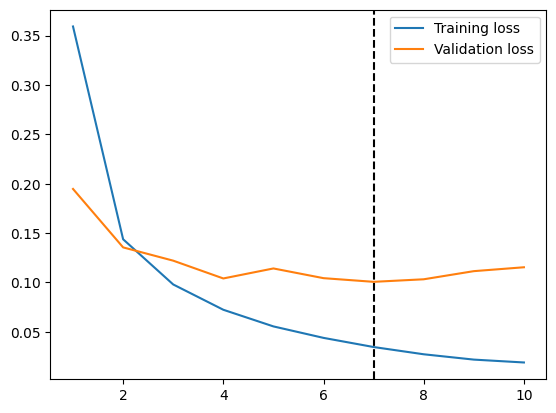

In [25]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(1, 11), h.history["loss"], label="Training loss")
plt.plot(np.arange(1, 11), h.history["val_loss"], label="Validation loss")
plt.axvline(x=np.argmin(h.history["val_loss"]) + 1, color='k', linestyle='--')
plt.legend();

Setting up other callbacks must be explicit. This is done by passing a list of callbacks to the `fit` method.

When training a model is long, one can wish to record intermediate models (in case of a crash during training, or just for cases when intermediate models were performing better than the final one).
The [`ModelCheckpoint`](https://keras.io/api/callbacks/model_checkpoint/) callback is designed for that purpose.

**Question #10.** Set up recording of intermediate models every epoch. Save the models into a dedicated file `model.keras` on your project. Only record models if validation loss is lower than for all previous models.

In [26]:
from keras.callbacks import ModelCheckpoint

cb = ModelCheckpoint("model.keras", save_best_only=True)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=10, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/10


/Users/rtavenar/py3.10_ml/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


600/600 - 7s - 12ms/step - accuracy: 0.9147 - loss: 0.2984 - val_accuracy: 0.9555 - val_loss: 0.1498
Epoch 2/10
600/600 - 6s - 9ms/step - accuracy: 0.9644 - loss: 0.1177 - val_accuracy: 0.9701 - val_loss: 0.0941
Epoch 3/10
600/600 - 5s - 9ms/step - accuracy: 0.9767 - loss: 0.0789 - val_accuracy: 0.9732 - val_loss: 0.0869
Epoch 4/10
600/600 - 5s - 9ms/step - accuracy: 0.9811 - loss: 0.0612 - val_accuracy: 0.9747 - val_loss: 0.0805
Epoch 5/10
600/600 - 5s - 9ms/step - accuracy: 0.9859 - loss: 0.0458 - val_accuracy: 0.9767 - val_loss: 0.0760
Epoch 6/10
600/600 - 5s - 9ms/step - accuracy: 0.9884 - loss: 0.0370 - val_accuracy: 0.9791 - val_loss: 0.0706
Epoch 7/10
600/600 - 5s - 9ms/step - accuracy: 0.9908 - loss: 0.0305 - val_accuracy: 0.9794 - val_loss: 0.0741
Epoch 8/10
600/600 - 5s - 9ms/step - accuracy: 0.9917 - loss: 0.0250 - val_accuracy: 0.9797 - val_loss: 0.0773
Epoch 9/10
600/600 - 5s - 9ms/step - accuracy: 0.9939 - loss: 0.0194 - val_accuracy: 0.9797 - val_loss: 0.0751
Epoch 10/10

Use the code below to check that a model has been saved:

In [27]:
%ls -alh "model.keras"

-rw-r--r--@ 1 rtavenar  staff   1.4M Oct  8 17:00 model.keras


In [28]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9731 - loss: 0.1036


[0.0890207588672638, 0.9768000245094299]

In [29]:
model.load_weights("model.keras")
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9754 - loss: 0.0819


[0.07058621942996979, 0.9790999889373779]

## Regularization

**Question #11.** Set up an [`EarlyStopping`](https://keras.io/api/callbacks/early_stopping/) strategy such that training the model will stop in case the validation loss does not decrease for 5 consecutive epochs.

In [30]:
from keras.callbacks import EarlyStopping

cb = EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True)

model = Sequential([
    InputLayer(input_shape=x_train.shape[1:]),
    Dense(units=128, activation="relu"),
    Dense(units=128, activation="relu"),
    Dense(units=y_train.shape[1], activation="softmax")
])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
h = model.fit(x_train, y_train, epochs=100, batch_size=100, verbose=2, validation_data=(x_test, y_test), callbacks=[cb])

Epoch 1/100
600/600 - 6s - 9ms/step - accuracy: 0.9158 - loss: 0.2924 - val_accuracy: 0.9585 - val_loss: 0.1368
Epoch 2/100
600/600 - 5s - 9ms/step - accuracy: 0.9646 - loss: 0.1201 - val_accuracy: 0.9679 - val_loss: 0.1050
Epoch 3/100
600/600 - 5s - 9ms/step - accuracy: 0.9757 - loss: 0.0806 - val_accuracy: 0.9749 - val_loss: 0.0852
Epoch 4/100
600/600 - 5s - 9ms/step - accuracy: 0.9812 - loss: 0.0609 - val_accuracy: 0.9730 - val_loss: 0.0874
Epoch 5/100
600/600 - 5s - 9ms/step - accuracy: 0.9862 - loss: 0.0461 - val_accuracy: 0.9739 - val_loss: 0.0839
Epoch 6/100
600/600 - 5s - 9ms/step - accuracy: 0.9878 - loss: 0.0383 - val_accuracy: 0.9759 - val_loss: 0.0789
Epoch 7/100
600/600 - 5s - 9ms/step - accuracy: 0.9898 - loss: 0.0316 - val_accuracy: 0.9757 - val_loss: 0.0850
Epoch 8/100
600/600 - 5s - 9ms/step - accuracy: 0.9922 - loss: 0.0248 - val_accuracy: 0.9777 - val_loss: 0.0764
Epoch 9/100
600/600 - 5s - 9ms/step - accuracy: 0.9935 - loss: 0.0199 - val_accuracy: 0.9775 - val_loss:

In [31]:
model.evaluate(x_test, y_test)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 1.0000 - loss: 0.0025

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9748 - loss: 0.0904


[0.0763961523771286, 0.9776999950408936]